In [1]:
import pandas as pd
traindf = pd.read_csv("train_titanic.csv", encoding="utf-8")
testdf = pd.read_csv("test_titanic.csv", encoding="utf-8")

In [2]:
traindf.isna().sum()

In [3]:
# 1.1 填數值型的缺失
med = traindf.median()
traindf = traindf.fillna(med)
# 1.2 填類別型的缺失
most = traindf["Embarked"].value_counts().idxmax()
traindf["Embarked"] = traindf["Embarked"].fillna(most)
traindf.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [4]:
# updata test 資料 不用重算 med 
testdf = testdf.fillna(med)
testdf["Embarked"] = testdf["Embarked"].fillna(most)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [5]:
# dummy coding Embarked sex
dummy = pd.get_dummies(traindf["Embarked"])
traindf = pd.concat([traindf, dummy], axis=1)
dummy = pd.get_dummies(traindf["Sex"])
traindf = pd.concat([traindf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0,1,0


In [6]:
# 處理人名資訊
s = "Braund, Mr. Owen Harris"
s.split(",")[-1].split(".")[0].replace(" ", "")

'Mr'

In [7]:
# 看看每一種有幾個, 再決定要留誰
def nameflow(s):
    return s.split(",")[-1].split(".")[0].replace(" ", "")
# pd.crosstab(traindf["Survived"], traindf["Name"].apply(nameflow))
# pd.crosstab(traindf["Sex"], traindf["Name"].apply(nameflow))

In [8]:
def nameflow(s):
    s = s.split(",")[-1].split(".")[0].replace(" ", "")
    saved = ["Mr", "Mrs", "Miss"]
    if s in saved:
        return s
    else:
        return "X"
s = traindf["Name"].apply(nameflow)
dummy = pd.get_dummies(s)
traindf = pd.concat([traindf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,X
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,...,Q,0,1,0,0,1,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,0,0,1,0,1,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,0,0,1,0,1,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,0,0,1,1,0,0,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,1,0,0,1,0,0,0,1,0


In [9]:
# 對test資料做一樣的處理
dummy = pd.get_dummies(testdf["Embarked"])
testdf = pd.concat([testdf, dummy], axis=1)
dummy = pd.get_dummies(testdf["Sex"])
testdf = pd.concat([testdf, dummy], axis=1)
s = testdf["Name"].apply(nameflow)
dummy = pd.get_dummies(s)
testdf = pd.concat([testdf, dummy], axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,X
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,0,1,0,1,0,1,0,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,1,0,1,0,1,0,0,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,0,1,0,1,0,1,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,0,0,1,0,0,0,1,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0,1,0,1,0,1,0,0


In [10]:
# 3. 決定丟掉
# traindf.columns 看有哪些欄位
traindf = traindf.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'X'], axis=1)
# test
testdf = testdf.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'X'], axis=1)


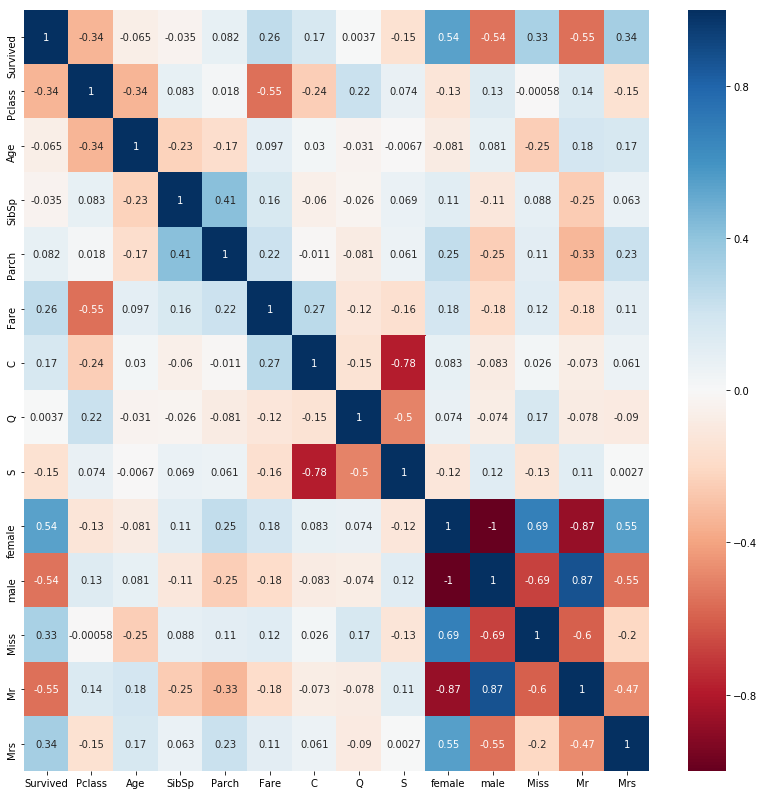

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# preview 個參數之間的關係
%matplotlib inline
plt.figure(figsize=(14, 14))
sns.heatmap(traindf.corr(), annot=True, cmap="RdBu")

In [12]:
# 第一種條法: 經驗(不要使用)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
x = traindf.drop(["Survived"], axis=1)
y = traindf["Survived"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)
# clf = RandomForestClassifier(max_depth=7, n_estimators=27)
# clf.fit(xtrain, ytrain)
# accuracy_score(clf.predict(xtest), ytest)
# 第二種條法: 交叉驗證 做十次的平均
from sklearn.model_selection import cross_val_score
import numpy as np
clf = RandomForestClassifier(max_depth=6, n_estimators=27)
scores = cross_val_score(clf, x, y, cv=10)
print(scores)
print(np.average(scores))
print("====================================")
# 第三種條法: 讓電腦幫我對所有參數都完成一次交叉驗證, 看一下哪組參數的結果最好
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":range(22, 26),
    "max_depth":range(4, 9)
}
clf = RandomForestClassifier()
g = GridSearchCV(clf, params, cv=10)
g.fit(x, y)
print(g.best_params_)
print(g.best_score_)

[0.81111111 0.81111111 0.7752809  0.88764045 0.86516854 0.82022472
 0.80898876 0.79775281 0.86516854 0.84090909]
0.8283356032232436
{'max_depth': 5, 'n_estimators': 23}
0.8338945005611672


In [13]:
clf = RandomForestClassifier(max_depth= 7, n_estimators= 23)
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
# 將完成的模型測試test
xtest = testdf.drop(["PassengerId"], axis=1)
pre = clf.predict(xtest)
resultdf = pd.DataFrame()
resultdf["PassengerId"] = testdf["PassengerId"]
resultdf["Survived"] = pre
# 存檔
resultdf.to_csv("result.csv", encoding="utf-8", index=False)
resultdf

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
